# Topics
## 1. A Deeper Understanding of Objects in Python
## 2. Relaxation Method


## Everything in Python is an Object...for example:

In [10]:
''' 
a = 2 in python has a very different meaning
from int a = 2 in c.
'''
a = 2
b = int(3)
print a, b
# __...__ : double underscore, or "dunder"
print dir(a)

2 3
['__abs__', '__add__', '__and__', '__class__', '__cmp__', '__coerce__', '__delattr__', '__div__', '__divmod__', '__doc__', '__float__', '__floordiv__', '__format__', '__getattribute__', '__getnewargs__', '__hash__', '__hex__', '__index__', '__init__', '__int__', '__invert__', '__long__', '__lshift__', '__mod__', '__mul__', '__neg__', '__new__', '__nonzero__', '__oct__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'imag', 'numerator', 'real']


In [4]:
print a.__abs__(), b.__abs__()

2 3


In [7]:
# The default value at instantiation is 0
c = int()
print c

0


In [6]:
# Is it legal? If so, what does this mean? If not, why not? 
gint = int

In [8]:
d = gint(4)
print d, type(d)

4 <type 'int'>


In [9]:
class hint(int):
    pass

e = hint(5)
print e, type(e)
print isinstance(e, hint), isinstance(e, int)

5 <class '__main__.hint'>
True True


In [11]:
# Is this ok?
print (-5).__abs__()

5


## Relaxation Methods: The Jacobi Method
### Solving a linear set of equations

In [58]:
import numpy as np

max_iter = 100

# initialize the matrix
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

D = np.diag(A)
print "The diagonal elements:\n", D
print "The diagonal matrix:\n", np.diagflat(D)
R = A - np.diagflat(D)
print "The remainder matrix:\n", R

# initialize the RHS vector
b = np.array([6., 25., -11., 15.])


# prints the linear system
print("System of Linear Equations:")
for i in range(A.shape[0]):
    row = ["{}*x{}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print " + ".join(row) + "=" + str(b[i])
print '\n\n'

# Initial Guess: Usually you would want an "educated" guess, 
# typcially x_guess = D^(-1)b. 
# But because the method is so robust, it hardly matters...
# We will try all 0's and a set of random numbers.
#x = np.zeros(b.shape)
x = np.random.rand(b.shape[0])
# specify tolerance
tol = 1e-4

counter = 0
print 'Starting Jacobi method iterations...'
while counter < max_iter:
    print "Iteration {:d}:{}".format(counter, x)
    # Just to create a numpy array that has the same dimension as x.
    x_new = np.empty(x.shape) # gives the same shape of x to x_new

    for i in range(A.shape[0]):
        # np.dot computes dot product
        
        s = np.dot(R[i,], x)
        x_new[i] = (b[i] - s) / A[i, i]
            
    counter += 1      
    # Returns True if two arrays are element-wise equal within a tolerance.
    if np.allclose(x, x_new, rtol=tol):
        print 'Tolerance achieved.  Printing results...'
        break      
    else:
        if counter == max_iter:
            raise Exception('max_iter exceeded!')

    x = x_new

print '\n\n'
print "Solution:", x 
print "Estimated Error:", (np.dot(A, x) - b)/b 

The diagonal elements:
[ 10.  11.  10.   8.]
The diagonal matrix:
[[ 10.   0.   0.   0.]
 [  0.  11.   0.   0.]
 [  0.   0.  10.   0.]
 [  0.   0.   0.   8.]]
The remainder matrix:
[[ 0. -1.  2.  0.]
 [-1.  0. -1.  3.]
 [ 2. -1.  0. -1.]
 [ 0.  3. -1.  0.]]
System of Linear Equations:
10.0*x1 + -1.0*x2 + 2.0*x3 + 0.0*x4=6.0
-1.0*x1 + 11.0*x2 + -1.0*x3 + 3.0*x4=25.0
2.0*x1 + -1.0*x2 + 10.0*x3 + -1.0*x4=-11.0
0.0*x1 + 3.0*x2 + -1.0*x3 + 8.0*x4=15.0



Starting Jacobi method iterations...
Iteration 0:[ 0.25294149  0.42818975  0.62749091  0.67618318]
Iteration 1:[ 0.51732079  2.16835299 -1.040151    1.79286521]
Iteration 2:[ 1.0248655   1.73623401 -0.80734234  0.93184875]
Iteration 3:[ 0.93509187  2.03836154 -1.03816482  1.12299445]
Iteration 4:[ 1.01146912  1.95708579 -0.97088278  0.98084382]
Iteration 5:[ 0.98988513  2.00891408 -1.00850086  1.01973248]
Iteration 6:[ 1.00259158  1.99292608 -0.99511237  0.99559461]
Iteration 7:[ 0.99831508  2.0018814  -1.00166625  1.00326368]
Iteration 8:[

In [60]:
import numpy as np
z = np.empty((5, 2))
w = np.zeros(z.shape)
print w
print z
#print z.shape[1]

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 1.  0.]
 [ 1.  1.]
 [ 0.  1.]
 [ 0.  0.]]


## Relaxation Methods: The Laplace Equation


More at http://en.wikipedia.org/wiki/Relaxation_(iterative_method)

## The Physics:
### This corresponds to the electric potential of a parallel plate capacitor 
### (length, width >> thickness)

[ 0.          0.09998692  0.19997634  0.29996902  0.39996537  0.49996537
  0.59996867  0.69997466  0.79998249  0.89999124  1.        ]


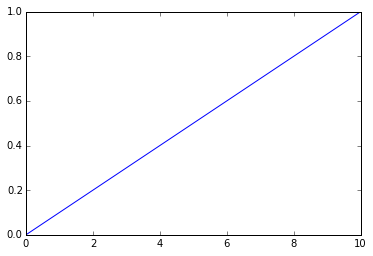

In [59]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt

NX = 11

#initialization
V = np.zeros(NX)

#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        newV = (V[i-1]+V[i+1])/2
        diff = abs(newV - V[i])
        V[i] = newV
   
            
print V
plt.plot(x, V)
plt.show()
          

[ 0.6364312   0.56198445  0.82914025  0.4737054   0.06309714  0.30786459
  0.85829218  0.18302463  0.02471466  0.51293399  0.06014319]
[ 0.          0.09998613  0.19997492  0.29996717  0.39996329  0.49996329
  0.5999668   0.69997314  0.79998144  0.89999072  1.        ]


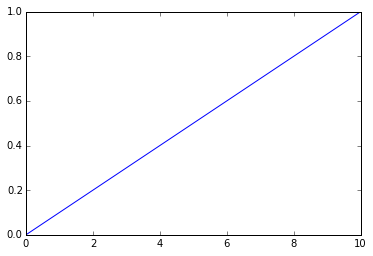

In [3]:
%matplotlib inline
# I can use random numbers to initialize the interior points.

import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

NX = 11

#initialization
V = rand(NX)    #yes I can initialize with random numbers!


#V = rand(NX)*1e12    # or even crazily large random numbers!

print V

#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        newV = (V[i-1]+V[i+1])/2
        diff = abs(newV - V[i])
        V[i] = newV
 
  
            
print V
plt.plot(x, V)
plt.show()

# A very robust method!
        

## Breakout Problem:
### For a long rectangular tube (say 10 by 10), the potential on two opposite sides = 1 volt, and the potential on the other two sides = 0.  
### Write a program to find V(x, y) in the interior of the tube. 
### Then plot the result as a surface plot.

[[ 0.18063136  0.27584494  0.87965634  0.88893788]
 [ 0.71667009  0.45274588  0.79722174  0.20621879]
 [ 0.80525326  0.13988612  0.1148129   0.67253745]
 [ 0.79670792  0.10842237  0.88893715  0.77515416]]
[[ 0.          1.          1.          0.        ]
 [ 0.          0.45274588  0.79722174  0.        ]
 [ 0.          0.13988612  0.1148129   0.        ]
 [ 0.          1.          1.          0.        ]]
[[ 0.          1.          1.          0.        ]
 [ 0.          0.33333328  0.33333329  0.        ]
 [ 0.          0.33333332  0.33333332  0.        ]
 [ 0.          1.          1.          0.        ]]


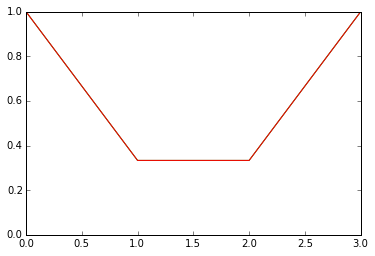

In [79]:
%matplotlib inline
# I can use random numbers to initialize the interior points.

import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

NX = 4
NY = 4

#initialization
V = rand(NX,NY)

print V

#Boundary Conditions:
V[0,:] = 1.
V[NY-1,:] = 1.
V[:,0] = 0
V[:,NX-1] = 0

print V
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        for j in range(1, NY-1):
            newV = (V[i-1, j+1]+V[i-1, j-1]+V[i+1,j+1]+V[i+1, j-1])/4
            diff = abs(newV - V[i,j])
            V[i,j] = newV

  
            
print V
plt.plot(x, V)
plt.show()

# A very robust method!

## We will see the connection between PDE and linear algebra next week.

## End of week 7-2